Team Members: Raya Namazi - Sina Daneshgar

Student Number:

Necessary Imports

In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/108.2 kB ? eta -:--:--
     ----------- --------------------------- 30.7/108.2 kB 1.4 MB/s eta 0:00:01
     ---------------------------- -------- 81.9/108.2 kB 770.8 kB/s eta 0:00:01
     ------------------------------------ 108.2/108.2 kB 700.0 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.2 MB 6.4 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install scikit-image


  Using cached scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2025.5.10-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.25.2-cp310-cp310-win_amd64.whl (12.8 MB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached tifffile-2025.5.10-py3-none-any.whl (226 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

At first, we need to apply motion blur manually, we call it "simulating motion blur".

the steps is:

1) Load a clean image

2) Generate a motion blur Point Spread Function (PSF)

3) Convolve PSF with the image to create a blurred version.

In [10]:
def apply_motion_blur(image, size=15):
    """
    Apply a simple horizontal motion blur to an image.
    Returns the blurred image and the blur kernel (PSF).
    """
    kernel = np.zeros((size, size))
    kernel[int((size - 1) / 2), :] = np.ones(size)
    kernel /= size
    blurred = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REPLICATE)
    return blurred, kernel

In [ ]:
def inverse_filter(blurred, kernel, eps=1e-3): ##### TRY larger eps, like eps=1e-1 if it was unstable
    """
    Restore a blurred image using inverse filtering in the frequency domain.
    """

    kh, kw = kernel.shape
    ih, iw = blurred.shape
    pad = ((0, ih - kh), (0, iw - kw))
    kernel_padded = np.pad(kernel, pad, 'constant')

    dft_blurred = np.fft.fft2(blurred)
    dft_kernel = np.fft.fft2(kernel_padded)

    dft_kernel[np.abs(dft_kernel) < eps] = eps

    dft_restored = dft_blurred / dft_kernel
    restored = np.fft.ifft2(dft_restored)
    restored = np.abs(restored)

    restored = np.clip(restored, 0, 255).astype('uint8')
    return restored

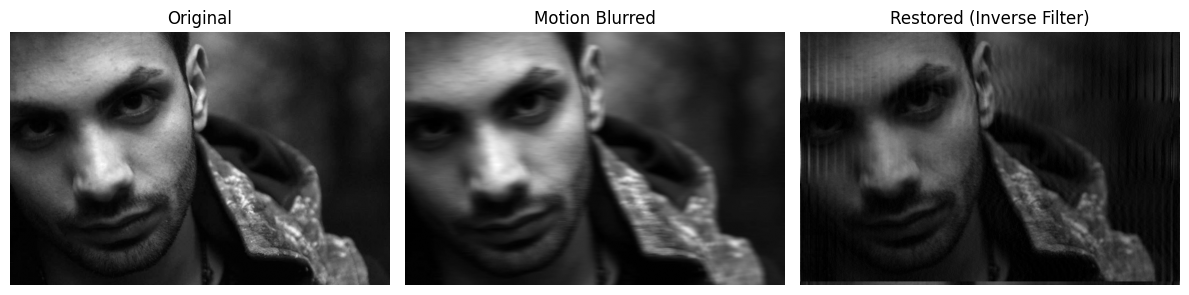

In [28]:
image = cv2.imread('../samples/Tdey.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found! Check path.")

blurred, psf = apply_motion_blur(image, size=20)
restored = inverse_filter(blurred, psf)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Motion Blurred")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Restored (Inverse Filter)")
plt.imshow(restored, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
def print_metrics(original, blurred, restored):
    print("PSNR (blurred):", psnr(original, blurred))
    print("SSIM (blurred):", ssim(original, blurred))
    print()
    print("PSNR (restored):", psnr(original, restored))
    print("SSIM (restored):", ssim(original, restored))


print_metrics(image, blurred, restored)

PSNR (blurred): 35.56754069712228
SSIM (blurred): 0.9321621431808701

PSNR (restored): 25.104212591683005
SSIM (restored): 0.6946491856855137
